# ML lab - 2 : Housing price prediction (Single variable linear regression)

    - Deivanai E A
      20BIS013

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.DataFrame(pd.read_csv("Housing.csv"))
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.shape

(545, 13)

In [6]:
df.isnull().sum()*100/df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [9]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

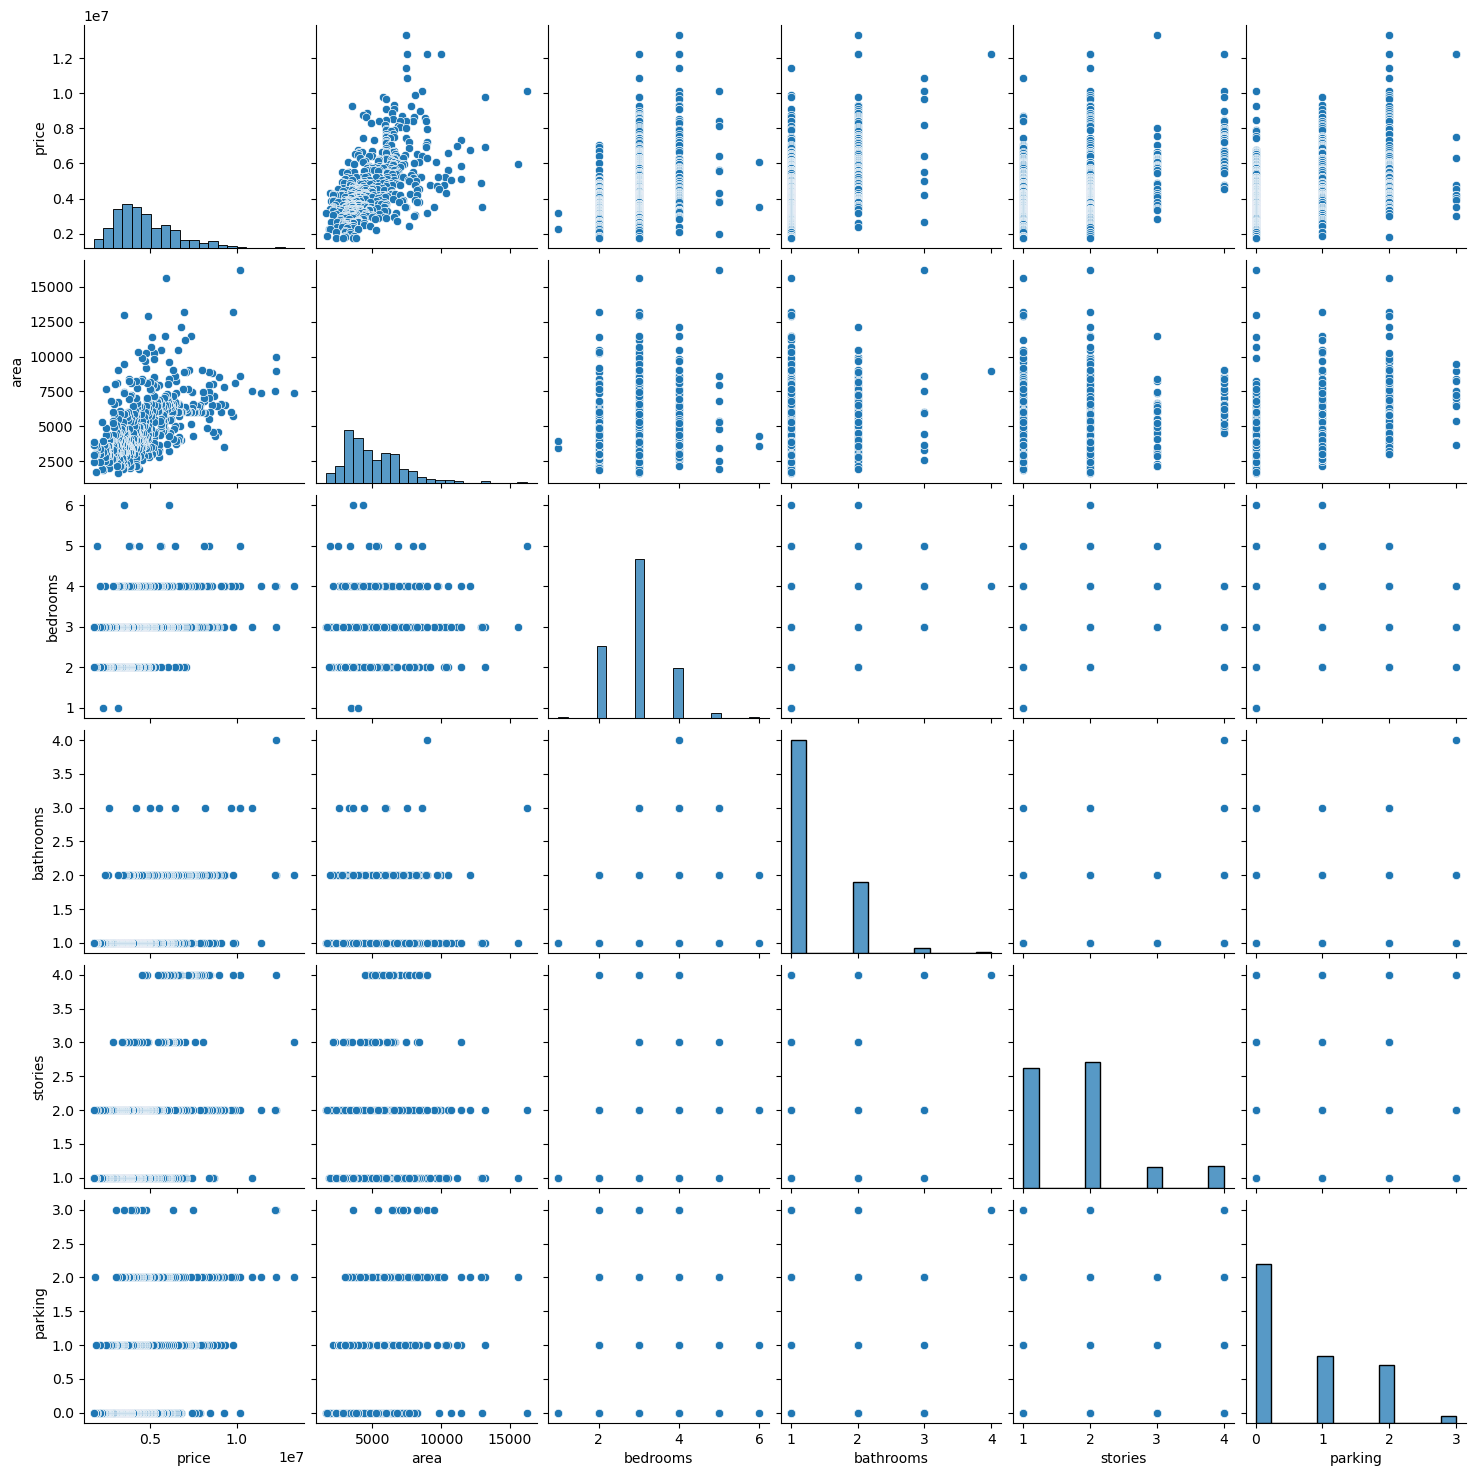

In [11]:
sns.pairplot(df)
plt.show()

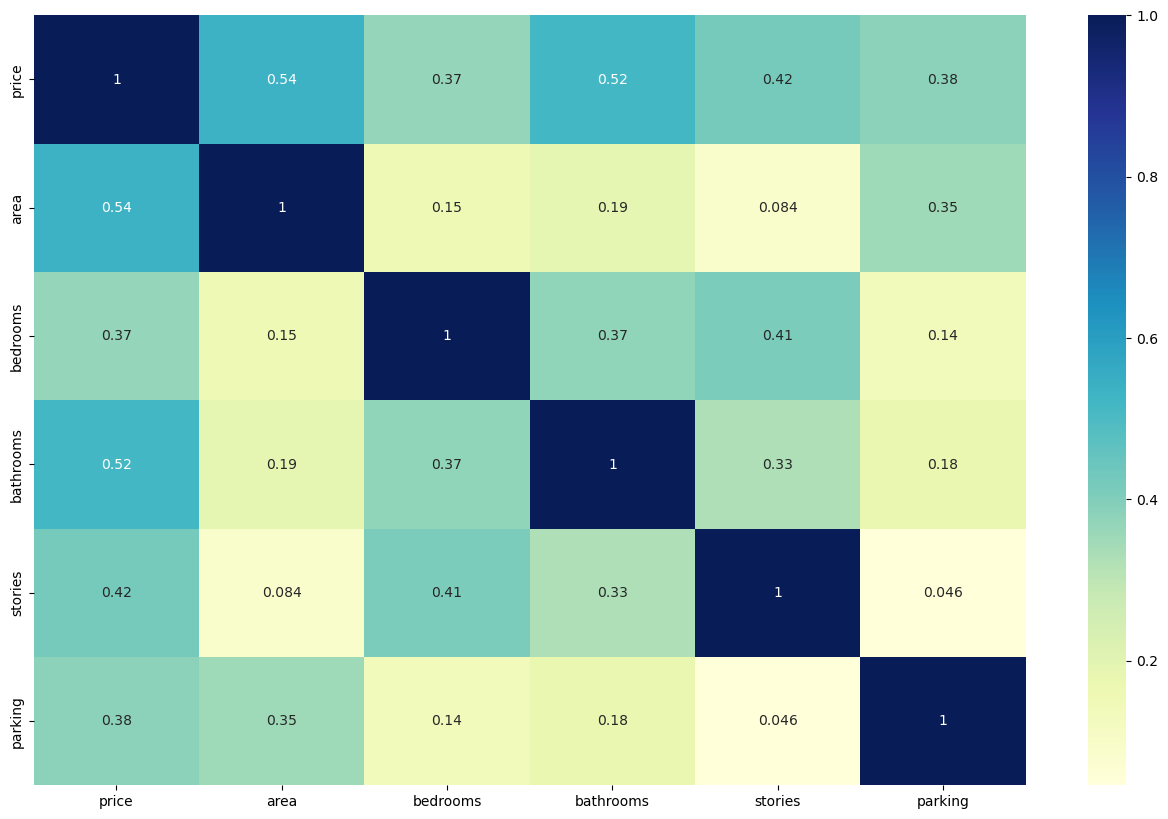

In [12]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [13]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


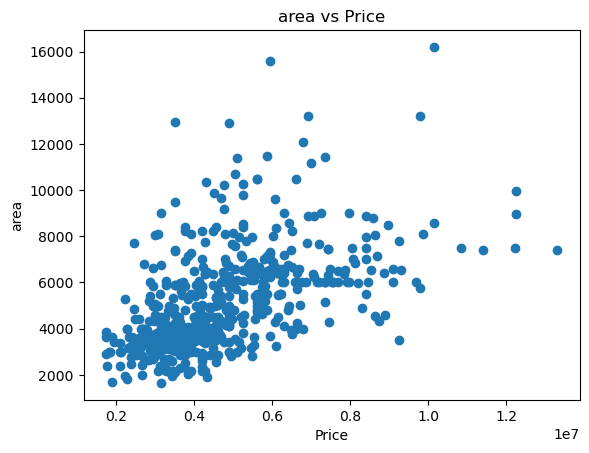

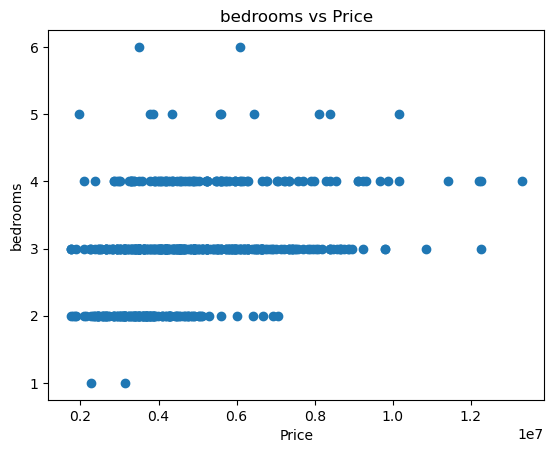

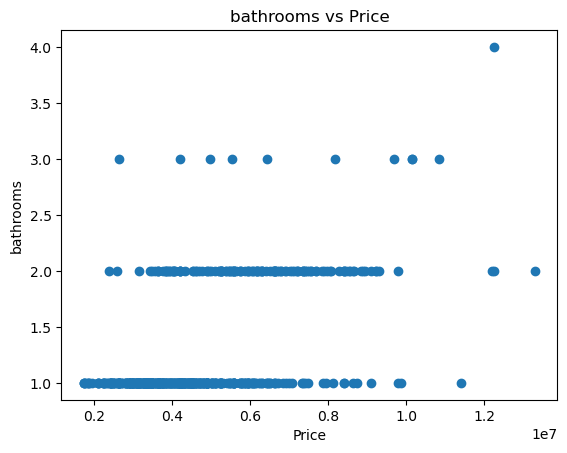

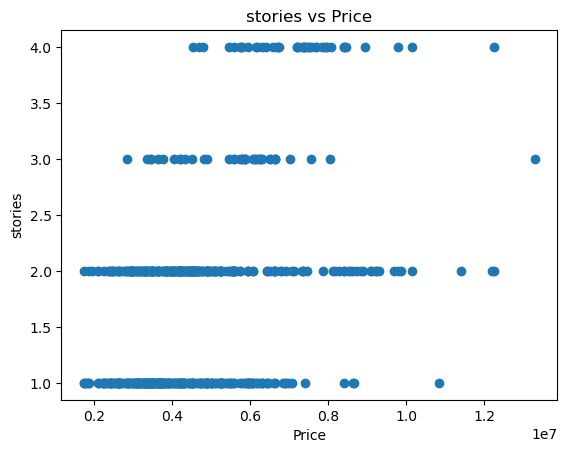

In [14]:
%matplotlib inline
def scatter_plot(x):
    
    plt.scatter(df['price'], df[x])
    plt.title(x +' vs Price') 
    plt.xlabel('Price') 
    plt.ylabel(x) 
    plt.show()


scatter_plot('area') 
scatter_plot('bedrooms') 
scatter_plot('bathrooms') 
scatter_plot('stories') 

In [16]:
y=df['price']

x=df.drop(['price','mainroad',
          'guestroom',
          'basement',
          'hotwaterheating',
          'airconditioning',
          'prefarea',
          'furnishingstatus'], axis=1)

In [17]:
x.shape , y.shape

((545, 5), (545,))

In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
model.score(x_test, y_test) , model.score(x_train, y_train)

(0.5667567951811983, 0.5573094026886815)

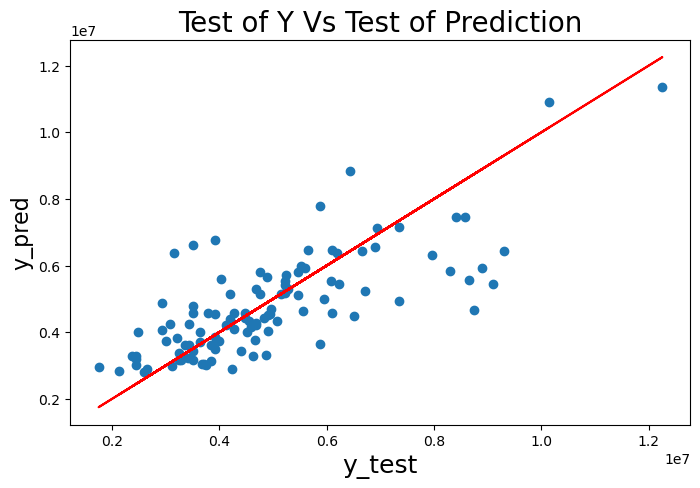

In [23]:
fig = plt.figure(figsize=(8,5))
y_pred= model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.title('Test of Y Vs Test of Prediction', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="r")

In [24]:
per_error = 100*(y_pred-y_test)/y_test

print("Maximum Percentage Error is:",abs(per_error).max())
print("Minimum Percentage Error is:",abs(per_error).min())
print("Mean Percentage Error is:",abs(per_error).mean())

Maximum Percentage Error is: 102.73145332175982
Minimum Percentage Error is: 0.09070064620718417
Mean Percentage Error is: 18.8318424514059


In [25]:
from sklearn.metrics import r2_score, mean_squared_error
print("Root mean squared error")
mean_squared_error(y_test, y_pred, squared = False) 

Root mean squared error


1240005.1406820337

In [26]:
print("R2 Score")
r2_score(y_test, y_pred)

R2 Score


0.5667567951811983